In [101]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [102]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [103]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [104]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [105]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [106]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [107]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [108]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

## GRADER PLEASE NOTE

* Some of the instructions are different from the original but still adhere to the rubric.
* The students get the average precipitation per day instead of every single precipitation value.

In [109]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
recent_year = int(recent_date[0:4])
recent_month = int(recent_date[5:7])
recent_day = int(recent_date[8:])
recent_date

'2017-08-23'

In [110]:
# Using this date, find the average precipitation per day
# for the preceding 12 months of data sorted by ascending date.
year_ago = dt.date(recent_year,recent_month,recent_day) - dt.timedelta(days=365)
query_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
query_results
query_dict = {}
for datestr,prcp in query_results:
    query_dict[datestr] = prcp

query_dict

{'2016-08-23': 0.7,
 '2016-08-24': 1.45,
 '2016-08-25': 0.11,
 '2016-08-26': 0.01,
 '2016-08-27': None,
 '2016-08-28': 2.07,
 '2016-08-29': 0.9,
 '2016-08-30': 0.05,
 '2016-08-31': 2.46,
 '2016-09-01': 0.01,
 '2016-09-02': 0.03,
 '2016-09-03': 1.0,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 1.0,
 '2016-09-07': 1.35,
 '2016-09-08': 0.15,
 '2016-09-09': 0.35,
 '2016-09-10': 1.16,
 '2016-09-11': 0.6,
 '2016-09-12': 1.04,
 '2016-09-13': 1.2,
 '2016-09-14': 6.7,
 '2016-09-15': 3.35,
 '2016-09-16': 0.61,
 '2016-09-17': 0.23,
 '2016-09-18': 0.42,
 '2016-09-19': 0.25,
 '2016-09-20': 0.43,
 '2016-09-21': 1.02,
 '2016-09-22': 0.75,
 '2016-09-23': 0.33,
 '2016-09-24': 0.27,
 '2016-09-25': 0.04,
 '2016-09-26': 1.02,
 '2016-09-27': 1.0,
 '2016-09-28': 0.05,
 '2016-09-29': 1.49,
 '2016-09-30': 0.38,
 '2016-10-01': 1.02,
 '2016-10-02': 0.61,
 '2016-10-03': 0.46,
 '2016-10-04': 3.46,
 '2016-10-05': 0.81,
 '2016-10-06': 0.04,
 '2016-10-07': 0.01,
 '2016-10-08': 0.04,
 '2016-10-09': 0.0,
 

In [182]:
# Convert your results into a pandas DataFrame with date as index.
query_df = pd.DataFrame.from_dict(query_dict, orient='index').reset_index().rename(columns={'index': 'date', 0:'prcp'})
query_df = query_df.set_index('date')
query_df

,prcp
date,
2016-08-23,0.70
2016-08-24,1.45
2016-08-25,0.11
2016-08-26,0.01
2016-08-27,NaN
...,...
2017-05-09,0.23
2017-05-26,0.00
2017-07-19,0.27


/Users/lbl/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

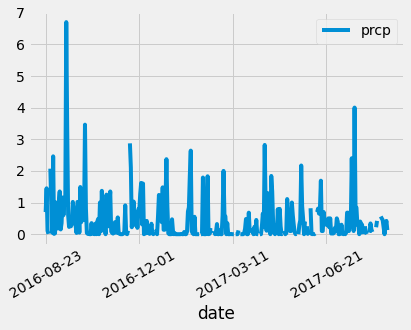

In [185]:
# Use Pandas Plotting with Matplotlib to plot the data
query_df.plot(rot=30)


In [113]:
# Use Pandas to calculate the summary statistics for the precipitation data
query_df.describe()

,prcp
count,345.000000
mean,0.432087
std,0.704363
min,0.000000
25%,0.010000
50%,0.140000
75%,0.580000
max,6.700000


# Exploratory Station Analysis

In [114]:
# Query total number of stations in dataset
stations = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).order_by(Measurement.tobs.desc()).all()
stations_df = pd.DataFrame(stations, columns=['id', 'station', 'date', 'prcp', 'tobs'])
stations_df

,id,station,date,prcp,tobs
0,213,USC00519397,2010-08-23,0.01,87.0
1,2636,USC00519397,2017-05-23,0.08,87.0
2,8991,USC00517948,2017-07-03,NaN,87.0
3,15210,USC00511918,2010-09-19,0.00,87.0
4,15588,USC00511918,2011-10-08,0.00,86.0
...,...,...,...,...,...
19545,15711,USC00511918,2012-02-10,0.00,56.0
19546,16753,USC00511918,2015-01-05,0.00,56.0
19547,16124,USC00511918,2013-04-03,0.00,55.0
19548,13294,USC00519281,2013-01-16,0.02,54.0


In [115]:
station_count = session.query(Station.station).count()
f'The total station count is: {station_count}'

'The total station count is: 9'

In [116]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations_df['station'].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [117]:
query_station_count = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
query_station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [147]:
# Using the station id from the previous query, calculate the lowest, 
# highest, and average temperature recorded for this station.
top_station_id = 'USC00519281'
session.query(func.min(Measurement.tobs),
func.max(Measurement.tobs),
func.avg(Measurement.tobs)).filter(Measurement.station ==top_station_id).all()

[(54.0, 85.0, 71.66378066378067)]

In [148]:
# Query the last 12 months of temperature observation data for this station.
# Plot the results as a histogram with bins = 12.
temp_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
temp_recent_year = int(temp_recent_date[0:4])
temp_recent_month = int(temp_recent_date[5:7])
temp_recent_day = int(temp_recent_date[8:])
year_of_temp_data = dt.date(temp_recent_year,temp_recent_month,temp_recent_day) - dt.timedelta(days=365)
temp_query_results = session.query(Measurement.date, Measurement.station, Measurement.tobs).filter(Measurement.station == top_station_id, Measurement.date >= year_of_temp_data).all()
temp_query_results
tobs_df = pd.DataFrame(temp_query_results, columns=['date', 'station', 'tobs'])
tobs_df

,date,station,tobs
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0
...,...,...,...
347,2017-08-14,USC00519281,77.0
348,2017-08-15,USC00519281,77.0
349,2017-08-16,USC00519281,76.0
350,2017-08-17,USC00519281,76.0


Text(0.5, 0, 'Temps.')

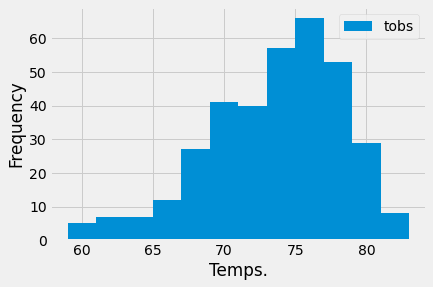

In [187]:
tobs_df.plot.hist(bins=12)
plt.xlabel('Temps.')


# Close session